# Loading libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
train_file_path="../evaluation/modeldata-training-and-testing.csv"
test_file_path="../validation/model-validation-data.csv"

In [3]:
training_data = pd.read_csv(train_file_path, sep=",", header=0)
testing_data = pd.read_csv(test_file_path, sep=",", header=0)

In [4]:
def clear_na_data(data):
    # Remove rows with NaN values
    data = data.dropna()
    return data

In [5]:
training_data=clear_na_data(training_data)
testing_data=clear_na_data(testing_data)

In [11]:
def get_suffled_data(data):
    # Shuffle the data
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    return data 

In [14]:
training_data=get_suffled_data(training_data)
testing_data=get_suffled_data(testing_data)

In [15]:
training_data.shape, testing_data.shape

((1085, 16), (356, 16))

In [24]:
def get_combined_features(data_frame):
    # Select both textual and developer experience features
    combined_features = data_frame[['ConceptualSimilarity', 'ReviewedCommitsFile', 'AuthorCommitsFile', 'ExtLibSimilarity','TotalReviewedCommits', 'ReviewedPRs','StopwordRatio']]
    return combined_features 

In [25]:
def get_all_features(data_frame):
    # Select all features
    all_features = data_frame.drop(columns=['className'])
    return all_features

In [26]:
X_train=get_all_features(training_data)
X_test=get_all_features(testing_data)
y_train=training_data["className"]
y_test=testing_data["className"]

In [27]:
def get_trained_model():
    model_rf_comined = RandomForestClassifier(n_estimators=2000, random_state=42)
    model_rf_comined.fit(X_train, y_train)
    return model_rf_comined

In [28]:
model_rf_combined = get_trained_model()

In [31]:
def evaluate_rf_model(model_rf_combined, X_test, y_test):
    y_pred = model_rf_combined.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

In [32]:
evaluate_rf_model(model_rf_combined, X_test, y_test)

Accuracy: 0.6376404494382022
Precision: 0.6252577536506334
Recall: 0.6376404494382022
F1 Score: 0.6309062592818796
Confusion Matrix:
 [[ 30  70]
 [ 59 197]]


# Visualize Feature Importance

In [33]:
def show_model_feature_importances(model, feature_names):
    # Get feature importances
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(len(feature_names)):
        print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

    # Plot the feature importances of the forest
    plt.figure(figsize=(5, 4))
    plt.title("Feature importances")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.show()

Feature ranking:
1. ConceptualSimilarity (0.11462408572379232)
2. CodeElementRatio (0.09273569339451286)
3. TotalReviewedCommits (0.09270065930690057)
4. ReviewedPRs (0.08907095699077114)
5. ReviewedCommitsFile (0.08811742448679884)
6. StopwordRatio (0.08262416645305129)
7. StopKeyRatio (0.08139309324293084)
8. ReadingEase (0.07890252815526744)
9. TotalAuthoredCommits (0.07441776567577844)
10. ReadingEase(NL) (0.0646501827750803)
11. ExtLibSimilarity (0.051780141031873304)
12. AuthorCommitsFile (0.043771523729034305)
13. QuestionRatio (0.025308289409854853)
14. CommittedTwice (0.012328420874766408)
15. ReviewingTwice (0.007575068749587229)


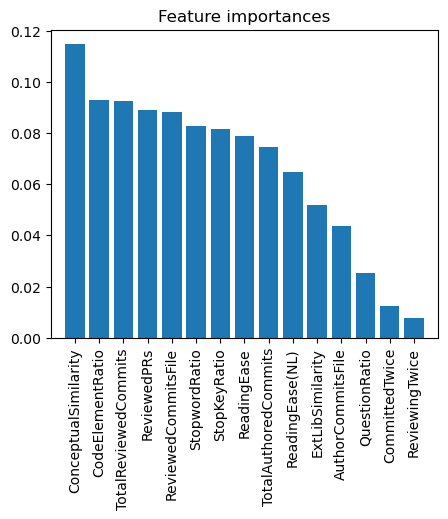

In [34]:
show_model_feature_importances(model_rf_combined, X_train.columns)